In [240]:
def get_financial_stats(ticker):
    url = "https://finance.yahoo.com/quote/" + ticker + "/key-statistics?p=" + ticker
    response = requests.get(url)
    results_page = BeautifulSoup(response.content,'lxml')
    stats_lists = results_page.find_all('table')
    test_list = list()
    for i in stats_lists:
        stat_name = i.find_all('span')
        stock_stat = i.find_all('td',class_='Fz(s) Fw(500) Ta(end)')
        for j in range(len(stock_stat)):
            if not stat_name[j].get_text() == 'N/A':
                test_list.append((stat_name[j].get_text(),stock_stat[j].get_text()))
    return test_list

In [244]:
def get_row(ticker,measure_list):
    from pandas_datareader import data as web
    a = get_financial_stats(ticker)
    a_row = list()
    a_row.append(round(web.DataReader(ticker,"yahoo").iloc[-1,3],2))
    for i in measure_list:
        if not i == "Price":
            appended = 0
            for j in a:
                if j[0] == i:
                    a_row.append(j[1])
                    appended = 1
            if appended == 0:
                a_row.append('N/A')   
    return a_row

In [245]:
def comp_stat_table(stock):
    import pandas as pd
    import numpy as np
    measure_list = ['Price','Market Cap (intraday)', 'Enterprise Value', 'Forward P/E', 'EBITDA', 'Total Cash Per Share', 'Dividend Date', 'Ex-Dividend Date', 'Last Split Factor (new per old)', '52 Week High']
    r = get_competitors(stock)
    r.insert(0, stock)
    a_row = get_row(r[1],measure_list)
    b_row = get_row(r[2],measure_list)
    c_row = get_row(r[3],measure_list)
    d_row = get_row(r[4],measure_list)
    s_row = get_row(stock,measure_list)
    stats_list = [s_row,a_row,b_row,c_row,d_row]
    final_table = pd.DataFrame(stats_list,index = r, columns = measure_list)
    return final_table

In [253]:
comp_stat_table('AZO')

,Price,Market Cap (intraday),Enterprise Value,Forward P/E,EBITDA,Total Cash Per Share,Dividend Date,Ex-Dividend Date,Last Split Factor (new per old),52 Week High
AZO,825.83,21.11B,25.93B,13.45,2.48B,10.85,N/A,N/A,N/A,842.10
ORLY,354.85,28.43B,31.22B,19.92,2.04B,0.5,N/A,N/A,N/A,363.20
JD,20.97,30.34B,29.69B,124.41,316.71M,5.04,N/A,N/A,N/A,50.68
ULTA,300.37,17.95B,18.36B,23.43,1.09B,6.46,N/A,N/A,N/A,302.71
IAC,180.28,15.06B,15.46B,35.42,714.05M,22.51,"Aug 21, 2008",N/A,N/A,223.54


156.27999877929688

In [54]:
#!pip install requests
#!pip install bs4
def get_summary(ticker):
    import requests
    from bs4 import BeautifulSoup
    url = "https://finance.yahoo.com/quote/"+ ticker + "/profile?p=" + ticker
    response = requests.get(url)
    results_page = BeautifulSoup(response.content,'lxml')
    summary = results_page.find_all('p',class_="Mt(15px) Lh(1.6)")
    if summary == []:
        return "Ticker Error, Please Check if the Ticker is Entered Correctly"
    return summary[0].get_text()

In [254]:
get_summary("AZO")

'AutoZone Inc. retails and distributes automotive replacement parts and accessories. The company offers various products for cars, sport utility vehicles, vans, and light trucks, including new and remanufactured automotive hard parts, maintenance items, accessories, and non-automotive products. Its products include A/C compressors, batteries and accessories, bearings, belts and hoses, calipers, carburetors, chassis, clutches, CV axles, engines, fuel pumps, fuses, ignition and lighting products, mufflers, radiators, starters and alternators, thermostats, and water pumps. The company also offers maintenance products, such as antifreeze and windshield washer fluids; brake drums, rotors, shoes, and pads; brake and power steering fluids, and oil and fuel additives; oil and transmission fluids; oil, air, fuel, and transmission filters; oxygen sensors; paints and accessories; refrigerants and accessories; shock absorbers and struts; spark plugs and wires; and windshield wipers, as well as air

In [99]:
def get_competitors(stock):
    url = 'https://www.nasdaq.com/symbol/' + stock + '/stock-comparison'

    response = requests.get(url)
    results_page = BeautifulSoup(response.content, 'lxml')
    table = results_page.find('div', class_='genTable thin')
    competitors = list()
    for i in range(4):
        competitors.append(table.find_all('input')[i].get('value'))
    
    return competitors

In [161]:
get_financial_stats("HPE")

https://finance.yahoo.com/quote/HPE/key-statistics?p=HPE


[('Market Cap (intraday)', '22.25B'),
 ('Enterprise Value', '28.87B'),
 ('Trailing P/E', '7.56'),
 ('Forward P/E', '9.51'),
 ('PEG Ratio (5 yr expected)', '-1.25'),
 ('Price/Sales', '0.73'),
 ('Price/Book', '0.96'),
 ('Enterprise Value/Revenue', '0.94'),
 ('Enterprise Value/EBITDA', '9.50'),
 ('Fiscal Year Ends', 'Oct 31, 2017'),
 ('Most Recent Quarter', 'Jul 31, 2018'),
 ('Profit Margin', '10.43%'),
 ('Operating Margin', '3.12%'),
 ('Return on Assets', '0.93%'),
 ('Return on Equity', '12.04%'),
 ('Revenue', '30.57B'),
 ('Revenue Per Share', '19.49'),
 ('Quarterly Revenue Growth', '3.50%'),
 ('Gross Profit', '8.69B'),
 ('EBITDA', '3.04B'),
 ('Net Income Avi to Common', '3.16B'),
 ('Diluted EPS', '2.00'),
 ('Quarterly Earnings Growth', '173.30%'),
 ('Total Cash', '5.19B'),
 ('Total Cash Per Share', '3.53'),
 ('Total Debt', '12.63B'),
 ('Total Debt/Equity', '53.81'),
 ('Current Ratio', '1.00'),
 ('Book Value Per Share', '15.81'),
 ('Operating Cash Flow', '2.02B'),
 ('Levered Free Cash Fl

In [80]:
def get_recent_news(ticker):
    url = "https://eresearch.fidelity.com/eresearch/evaluate/snapshot.jhtml?symbols=" + ticker
    response = requests.get(url)
    results_page = BeautifulSoup(response.content,'lxml')
    summary = results_page.find_all('li',class_ = "news-item")
    newslist = list()
    import re
    for i in summary:
        newstext = re.sub('[^A-Za-z0-9]+', ' ', i.get_text())
        newsurl = "https://eresearch.fidelity.com" + i.find_all('a')[1].get('href')
        newslist.append([newstext[1:re.search(r'(\d{2}) (\d{2}) 2018',newstext).span()[0]],newsurl])
    return newslist

In [82]:
get_recent_news("HPQ")

[['HP Inc tops revenue estimates on growth in personal systems business Reuters 4 38 PM ET ',
  'https://eresearch.fidelity.com/eresearch/evaluate/news/basicNewsStory.jhtml?symbols=HPQ&storyid=201811291638RTRSNEWSCOMBINED_L4N1Y45MY_1&provider=RTRSNEWS&product=COMBINED&sb=1'],
 ['HP stock rises on fiscal Q4 beat MarketWatch 4 27 PM ET ',
  'https://eresearch.fidelity.com/eresearch/evaluate/news/basicNewsStory.jhtml?symbols=HPQ&storyid=201811291627MRKTWTCHNEWS_SVC000508&provider=MRKTWTCH&product=NEWS_SVC&sb=1'],
 ['Form 8 K HP INC For Nov 29 EDGAR SEC Filings 4 24 PM ET ',
  'https://eresearch.fidelity.com/eresearch/evaluate/news/basicNewsStory.jhtml?symbols=HPQ&storyid=201811291624TENKWIZ_SECEDGAR_A8ZZO222Z222V2Z2222L22ZZN8UAZBA72HA2&provider=TENKWIZ_&product=SECEDGAR&sb=1'],
 ['HP Inc quarterly revenue beats estimates Reuters 4 19 PM ET ',
  'https://eresearch.fidelity.com/eresearch/evaluate/news/basicNewsStory.jhtml?symbols=HPQ&storyid=201811291619RTRSNEWSCOMBINED_L4N1Y45KK_1&provider

In [355]:
def get_income_table(ticker):
    from IPython.display import display
    from yahoo_fin import stock_info as si
    import pandas as pd
    df = si.get_income_statement(ticker)
    display(df)
get_income_table('AAPL')

,Revenue,9/29/2018,9/30/2017,9/24/2016,9/26/2015
0,Total Revenue,265595000,229234000,215639000,233715000
1,Cost of Revenue,163756000,141048000,131376000,140089000
2,Gross Profit,101839000,88186000,84263000,93626000
3,Operating Expenses,NaN,NaN,NaN,NaN
4,Research Development,14236000,11581000,10045000,8067000
5,Selling General and Administrative,16705000,15261000,14194000,14329000
6,Non Recurring,-,-,-,-
7,Others,-,-,-,-
8,Total Operating Expenses,194697000,167890000,155615000,162485000
9,Operating Income or Loss,70898000,61344000,60024000,71230000


In [352]:
def get_analysis(ticker):
    from IPython.display import display
    from yahoo_fin import stock_info as si
    import pandas as pd
    df = si.get_analysts_info(ticker)
    for i in list(df.keys()):
        display(pd.DataFrame(df.get(i)))
get_analysis('AAPL')

,Earnings Estimate,Current Qtr. (Dec 2018),Next Qtr. (Mar 2019),Current Year (2019),Next Year (2020)
0,No. of Analysts,34.00,33.00,40.00,34.00
1,Avg. Estimate,4.72,3.04,13.45,14.83
2,Low Estimate,4.51,2.41,11.54,10.98
3,High Estimate,5.59,3.39,15.40,18.50
4,Year Ago EPS,3.89,2.73,11.91,13.45


,Revenue Estimate,Current Qtr. (Dec 2018),Next Qtr. (Mar 2019),Current Year (2019),Next Year (2020)
0,No. of Analysts,31,31,37,31
1,Avg. Estimate,91.88B,64.83B,279.29B,291.14B
2,Low Estimate,88.96B,59.99B,269.23B,273.13B
3,High Estimate,100.93B,67.3B,292.33B,326.36B
4,Year Ago Sales,88.29B,61.14B,265.6B,279.29B
5,Sales Growth (year/est),4.10%,6.00%,5.20%,4.20%


,Earnings History,12/30/2017,3/30/2018,6/29/2018,9/29/2018
0,EPS Est.,3.86,2.67,2.18,2.78
1,EPS Actual,3.89,2.73,2.34,2.91
2,Difference,0.03,0.06,0.16,0.13
3,Surprise %,0.80%,2.20%,7.30%,4.70%


,EPS Trend,Current Qtr. (Dec 2018),Next Qtr. (Mar 2019),Current Year (2019),Next Year (2020)
0,Current Estimate,4.72,3.04,13.45,14.83
1,7 Days Ago,4.74,3.05,13.48,14.82
2,30 Days Ago,4.94,3.13,13.77,15.23
3,60 Days Ago,4.92,3.12,13.71,15.08
4,90 Days Ago,4.87,3.09,13.56,14.97


,EPS Revisions,Current Qtr. (Dec 2018),Next Qtr. (Mar 2019),Current Year (2019),Next Year (2020)
0,Up Last 7 Days,NaN,NaN,NaN,NaN
1,Up Last 30 Days,4.0,5.0,5.0,4.0
2,Down Last 7 Days,NaN,NaN,NaN,NaN
3,Down Last 30 Days,2.0,3.0,3.0,NaN


,Growth Estimates,AAPL,Industry,Sector,S&P 500
0,Current Qtr.,21.30%,NaN,NaN,0.48
1,Next Qtr.,11.40%,NaN,NaN,0.40
2,Current Year,12.90%,NaN,NaN,0.21
3,Next Year,10.30%,NaN,NaN,0.10
4,Next 5 Years (per annum),13.00%,NaN,NaN,0.11
5,Past 5 Years (per annum),11.72%,NaN,NaN,NaN


In [353]:
#use yahoo_fin to extract key financial information from yahoo finance
from yahoo_fin import stock_info as si
import pandas as pd
#df = si.get_quote_table('AAPL')
#df
df2 = si.get_income_statement("AAPL")
df2
#df3 = si.get_analysts_info('nflx')
#print(list(df3.keys())[0])
#print(df3.get('Earnings Estimate'))
#pd.DataFrame(df3.get('Earnings Estimate'))

,Revenue,9/29/2018,9/30/2017,9/24/2016,9/26/2015
0,Total Revenue,265595000,229234000,215639000,233715000
1,Cost of Revenue,163756000,141048000,131376000,140089000
2,Gross Profit,101839000,88186000,84263000,93626000
3,Operating Expenses,NaN,NaN,NaN,NaN
4,Research Development,14236000,11581000,10045000,8067000
5,Selling General and Administrative,16705000,15261000,14194000,14329000
6,Non Recurring,-,-,-,-
7,Others,-,-,-,-
8,Total Operating Expenses,194697000,167890000,155615000,162485000
9,Operating Income or Loss,70898000,61344000,60024000,71230000


In [328]:
def plot_key_technical(ticker,start,end):
    %matplotlib inline  

    import pandas_datareader.data as web
    import pandas as pd
    import matplotlib.pyplot as plt
    from matplotlib import dates as mdates
    from mpl_finance import candlestick_ohlc
    import datetime as dt

    symbol = ticker
    data = web.DataReader(symbol, 'yahoo', start, end) 
    data.reset_index(inplace=True)
    data['Date']=mdates.date2num(data['Date'].astype(dt.date))

    x = data['Date']

    EMA_1_span = 7
    EMA_1 = data['Close'].ewm(span=EMA_1_span,min_periods=EMA_1_span).mean()

    EMA_2_span = 30
    EMA_2 = data['Close'].ewm(span=EMA_2_span,min_periods=EMA_2_span).mean()

    SMA_2_span = EMA_2_span
    SMA_2 = data['Close'].rolling(window=SMA_2_span,center=False).mean()

    MACD = EMA_1 - EMA_2

    # plot

    fig, (ax, ax2, ax3) = plt.subplots(3, sharex=True, figsize=(12,15))

    # plot candlestick, SAM, EMA in subplot_1
    candlestick_ohlc(ax,data.values,width=0.5);
    p1 = ax.plot(x, EMA_1, label='EMA(' + str(EMA_1_span) + ')')
    p2 = ax.plot(x, EMA_2, label='EMA(' + str(EMA_2_span) + ')')
    p3 = ax.plot(x, SMA_2, label='SMA(' + str(SMA_2_span) + ')')
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
    ax.xaxis.set_major_locator(mdates.MonthLocator([1,4,7,10]))
    ax.xaxis.set_major_formatter(mdates.DateFormatter("%b '%y"))
    ax.set_ylabel('Price', fontsize=16)
    ax.legend(loc=4)

    # plot volume in subplot_2
    ax2.bar(x,data['Volume']);
    ax2.set_ylabel('Volume', fontsize=16)

    # plot MACD in subplot_3
    ax3.plot(x, MACD, label='MACD (' + 'EMA(' + str(EMA_1_span) + '), ' + 'EMA(' + str(EMA_2_span) + '))')
    ax3.axhline(0, color='gray', linestyle='--')
    ax3.set_xlabel('Date')
    ax3.set_ylabel('MACD', fontsize=16)
    ax3.legend(loc=4)


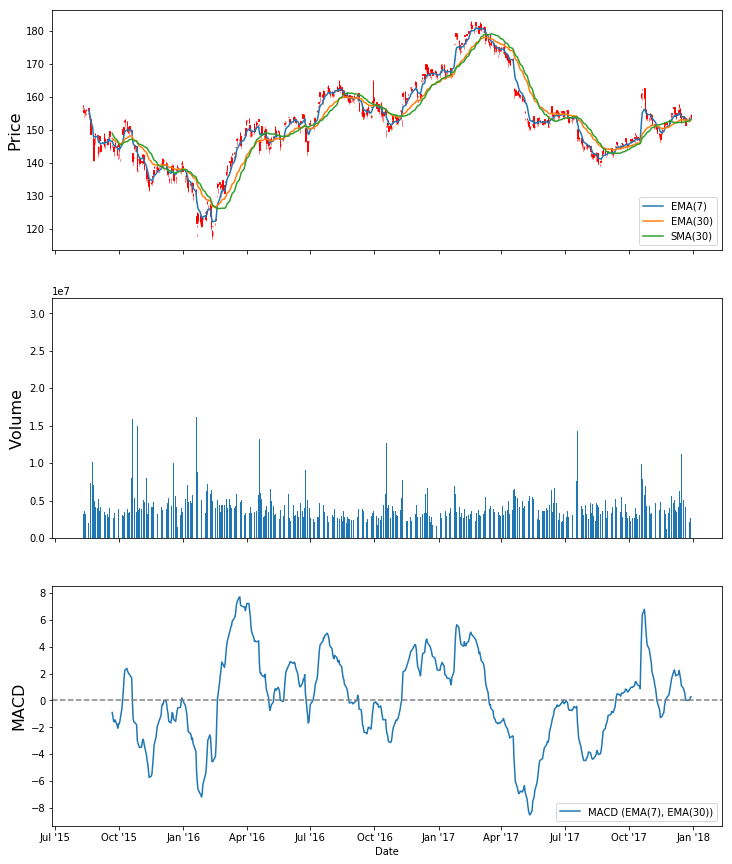

In [330]:
plot_key_technical("IBM",datetime(2015, 8, 8),datetime(2018, 1, 1))

In [315]:
def plot_price(ticker,start,end):
    import matplotlib.patches as mpatches
    import matplotlib.pyplot as plt
    from pandas_datareader import data as web
    temp_df = web.DataReader(ticker,"yahoo",start,end)
    plt.figure(figsize=(8,5))
    plt.plot(temp_df.index,temp_df.iloc[:,3],'b')
    plt.title(ticker + " Stock Price",fontsize=20)
    plt.xlabel('Date') 
    plt.ylabel('Price($)')
    plt.show()

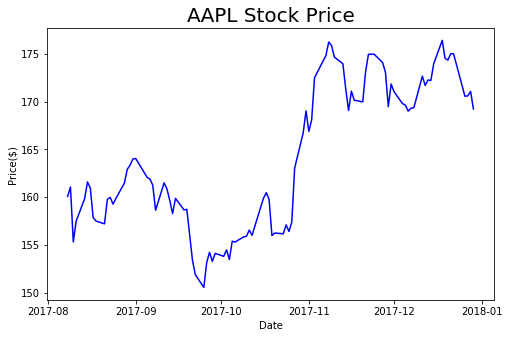

In [316]:
from datetime import datetime
plot_price("AAPL",datetime(2017, 8, 8),datetime(2018, 1, 1))

In [313]:
def plot_technical_stats(ticker,stat,start,end):
    """
    Supported statistics/indicators are:
        change (in percent)
        delta
        permutation (zero based)
        log return
        max in range
        min in range
        middle = (close + high + low) / 3
        SMA: simple moving average
        EMA: exponential moving average
        MSTD: moving standard deviation
        MVAR: moving variance
        RSV: raw stochastic value
        RSI: relative strength index
        KDJ: Stochastic oscillator
        Bolling: including upper band and lower band.
        MACD: moving average convergence divergence. Including signal and histogram.
        CR:
        WR: Williams Overbought/Oversold index
        CCI: Commodity Channel Index
        TR: true range
        ATR: average true range
        line cross check, cross up or cross down.
        DMA: Different of Moving Average (10, 50)
        DMI: Directional Moving Index, including
        +DI: Positive Directional Indicator
        -DI: Negative Directional Indicator
        ADX: Average Directional Movement Index
        ADXR: Smoothed Moving Average of ADX
        TRIX: Triple Exponential Moving Average
        VR: Volatility Volume Ratio
    """ 
    import matplotlib.patches as mpatches
    import matplotlib.pyplot as plt
    from pandas_datareader import data as web
    from stockstats import StockDataFrame as Sdf
    stock = web.get_data_yahoo(ticker)
    stock_df = Sdf.retype(stock)
    stock[stat]=stock_df[stat]
    plt.figure(figsize=(8,5))
    plt.plot(stock.index,stock[stat],'b')
    plt.title(stat + " for " + ticker,fontsize=20)
    plt.xlabel('Date') 
    plt.ylabel(stat)
    plt.show()

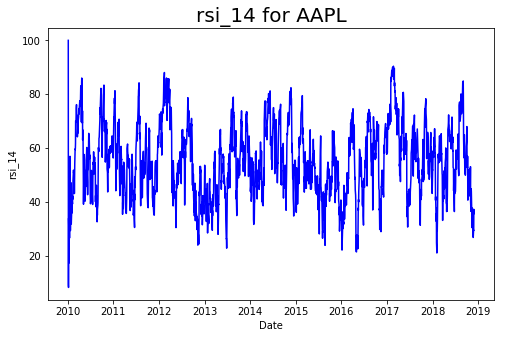

In [314]:
from datetime import datetime
plot_technical_stats("AAPL",'rsi_14',datetime(2008, 8, 8),datetime(2018, 1, 1))